In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
carprice_df = pd.read_csv('CarPrice_project.csv')
carprice_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
car_df = carprice_df.copy()

In [4]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
print(f'Number of rows: {car_df.shape[0]}')
print(f'Number of columns: {car_df.shape[1]}')

Number of rows: 205
Number of columns: 26


In [6]:
car_df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [8]:
#making data ready

In [9]:
# Converting 'price' to numeric if it's not already
car_df['price'] = pd.to_numeric(car_df['price'], errors='coerce')

# Converting 'horsepower' to numeric (in case of string type)
car_df['horsepower'] = pd.to_numeric(car_df['horsepower'], errors='coerce')

# Converting 'peakrpm' to numeric
car_df['peakrpm'] = pd.to_numeric(car_df['peakrpm'], errors='coerce')

# Converting 'curbweight' to numeric
car_df['curbweight'] = pd.to_numeric(car_df['curbweight'], errors='coerce')
car_df.dropna(subset=['price', 'horsepower', 'peakrpm', 'curbweight'], inplace=True)
car_df.rename(columns={'curbweight': 'Curb Weight (lbs)'}, inplace=True)


In [ ]:
#checking

In [10]:
car_df.columns


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'Curb Weight (lbs)', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [11]:
def complete_info(df):
    print("🧾 DataFrame Info:\n")
    print(df.info())

    print("\n📊 Summary Statistics:\n")
    print(df.describe(include='all'))

    print("\n🔎 Missing Values:\n")
    print(df.isnull().sum())

    print("\n🔁 Number of Unique Values Per Column:\n")
    print(df.nunique())


In [12]:
complete_info(car_df)

🧾 DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_ID             205 non-null    int64  
 1   symboling          205 non-null    int64  
 2   CarName            205 non-null    object 
 3   fueltype           205 non-null    object 
 4   aspiration         205 non-null    object 
 5   doornumber         205 non-null    object 
 6   carbody            205 non-null    object 
 7   drivewheel         205 non-null    object 
 8   enginelocation     205 non-null    object 
 9   wheelbase          205 non-null    float64
 10  carlength          205 non-null    float64
 11  carwidth           205 non-null    float64
 12  carheight          205 non-null    float64
 13  Curb Weight (lbs)  205 non-null    int64  
 14  enginetype         205 non-null    object 
 15  cylindernumber     205 non-null    object 
 16  engines

In [13]:
categorical_summary = car_df.groupby('carbody').agg({
    'price': 'mean',
    'horsepower': 'mean',
    'Curb Weight (lbs)': 'sum',
    'enginesize': 'mean'
})

categorical_summary


,price,horsepower,Curb Weight (lbs),enginesize
carbody,,,,
convertible,21890.500000,131.666667,16810,157.166667
hardtop,22208.500000,142.250000,22485,176.250000
hatchback,10376.652386,101.171429,164373,114.400000
sedan,14344.270833,103.104167,250617,130.822917
wagon,12371.960000,97.440000,69606,123.840000


In [14]:
#exploratory analysis and visual insightrs

Unique car body types: 5


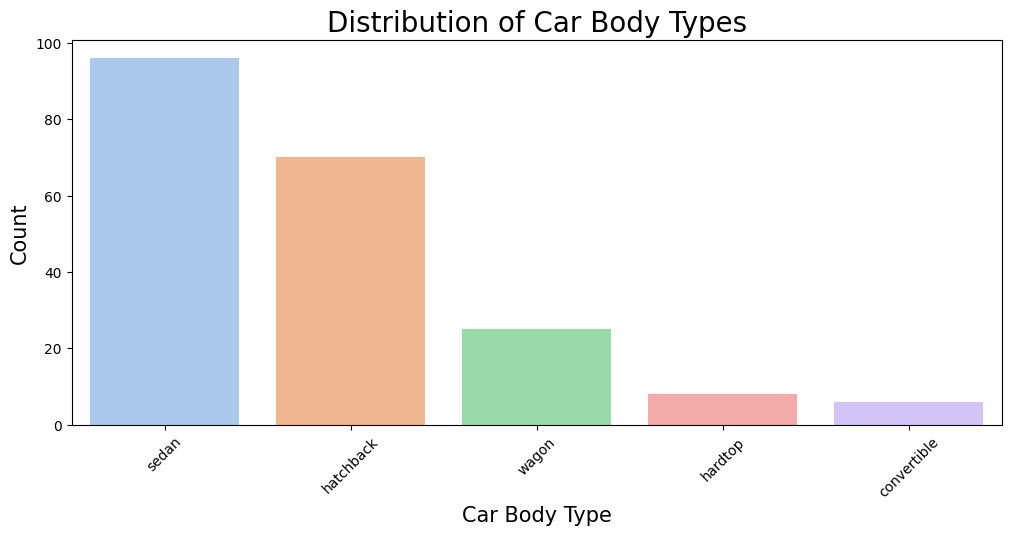

In [15]:

print(f"Unique car body types: {len(car_df['carbody'].unique())}")

x = car_df['carbody'].value_counts().index
y = car_df['carbody'].value_counts()

xaxis = []
yaxis = []

for i in range(len(y)):
    xaxis.append(x[i])
    yaxis.append(y[i])


plt.figure(figsize=(12, 5))
plt.xlabel("Car Body Type", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=45)
category_graph = sns.barplot(x=xaxis, y=yaxis, palette="pastel")
category_graph.set_title("Distribution of Car Body Types", fontsize=20)
plt.show()


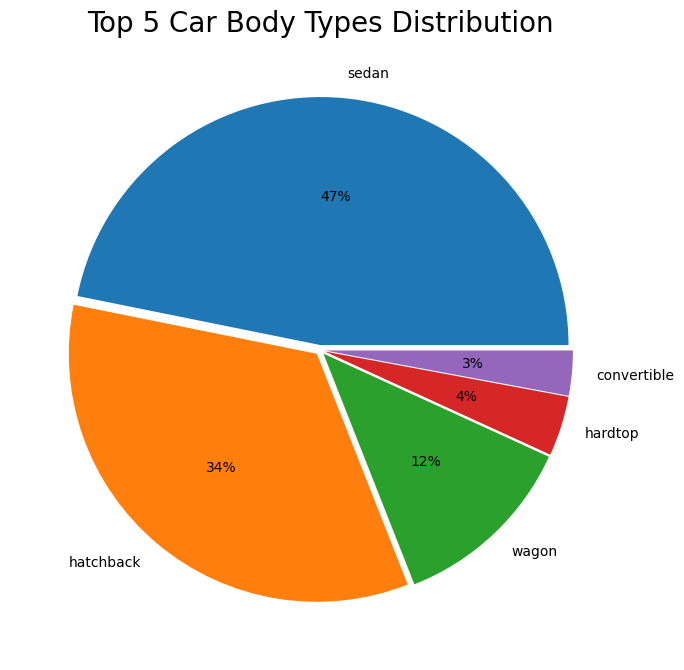

In [16]:

top5_carbody = car_df['carbody'].value_counts().head(5).reset_index()
top5_carbody.columns = ['CarBody', 'Count']


plt.figure(figsize=(8, 10))
plt.pie(top5_carbody['Count'],
        labels=top5_carbody['CarBody'],
        autopct='%.0f%%',
        explode=[0.02]*5)
plt.title('Top 5 Car Body Types Distribution', fontsize=20)
plt.show()


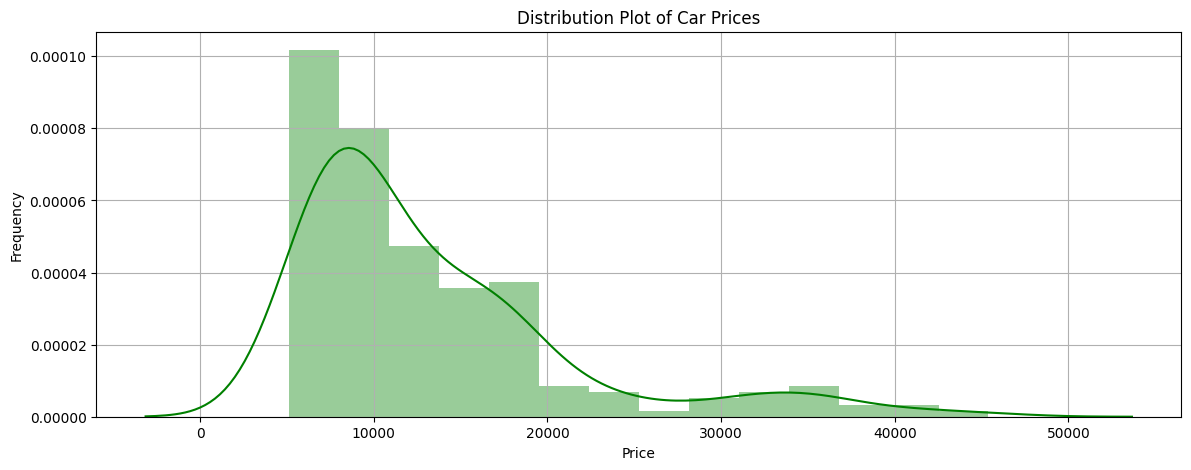

In [17]:

plt.figure(figsize=(14,5))
sns.distplot(car_df['price'], color='green')
plt.grid()
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title('Distribution Plot of Car Prices')
plt.show()

In [18]:
# Average price of cars
avg_price = car_df['price'].mean()
print('The average car price is', avg_price)

# Cars priced at the maximum price (like 5-star apps)
max_price = car_df['price'].max()
top_price_cars = car_df[car_df['price'] == max_price]

# Number of unique car models at the top price
print("Number of unique car models with top price:", top_price_cars['CarName'].nunique())

# Top carbody types for highest priced cars
top_price_carbody_counts = top_price_cars['carbody'].value_counts().reset_index()
top_price_carbody_counts.columns = ['CarBody', 'Count']
print("\nTop carbody types for highest priced cars:")
print(top_price_carbody_counts.head(10))


The average car price is 13276.710570731706
Number of unique car models with top price: 1

Top carbody types for highest priced cars:
   CarBody  Count
0  hardtop      1


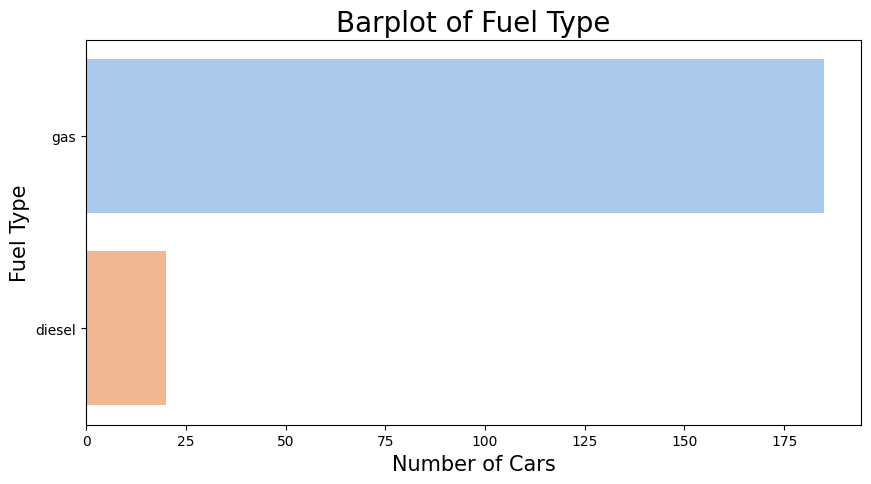

In [19]:
# Value counts of fueltype (similar to content rating)
value_c = car_df["fueltype"].value_counts().reset_index()
value_c.columns = ['fueltype', 'count']

# Barplot of fueltype value counts
plt.figure(figsize=(10,5))
sns.barplot(x="count", y="fueltype", data=value_c, palette="pastel")
plt.title("Barplot of Fuel Type", fontsize=20)
plt.xlabel("Number of Cars", fontsize=15)
plt.ylabel("Fuel Type", fontsize=15)
plt.show()


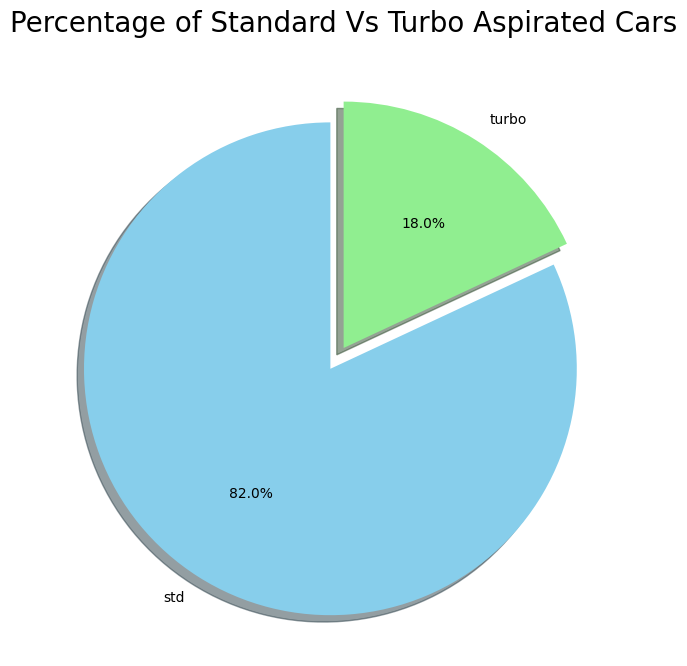

In [20]:
# Pie chart for aspiration types
plt.figure(figsize=(8,8))
labels = car_df['aspiration'].value_counts().index
sizes = car_df['aspiration'].value_counts()
colors = ["skyblue", "lightgreen"]
explode = (0.1, 0) if len(sizes) == 2 else [0.1] + [0]*(len(sizes)-1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage of Standard Vs Turbo Aspirated Cars', size=20)
plt.show()



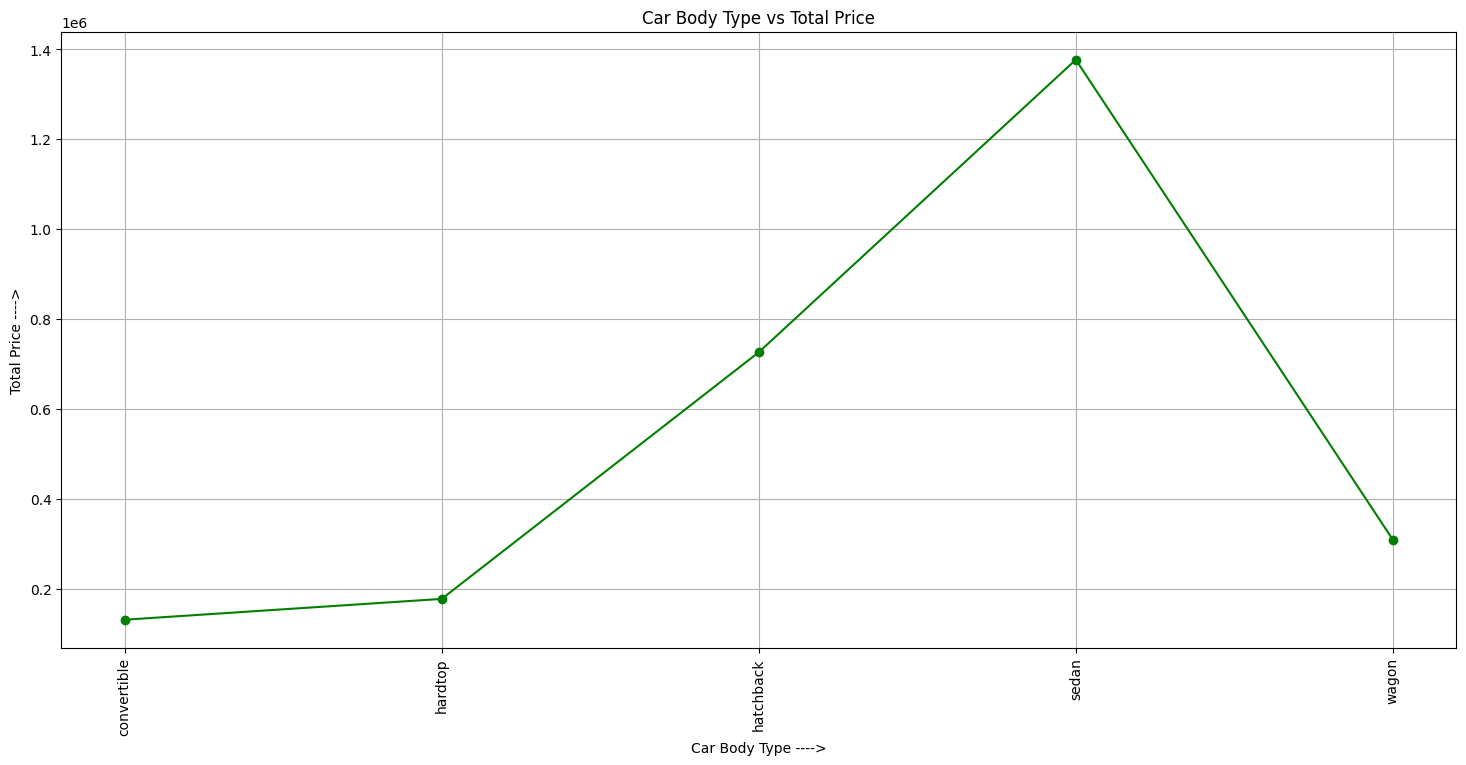

In [21]:
# defining x
x = car_df.groupby('carbody')['price'].agg(np.sum)

# plotting line graph to determine which carbody has the highest total price sum
plt.figure(figsize=(18,8))
plt.plot(x, color='green', marker='o')
plt.xticks(rotation=90)
plt.xlabel('Car Body Type ---->')
plt.ylabel('Total Price ---->')
plt.title('Car Body Type vs Total Price')
plt.grid()
plt.show()


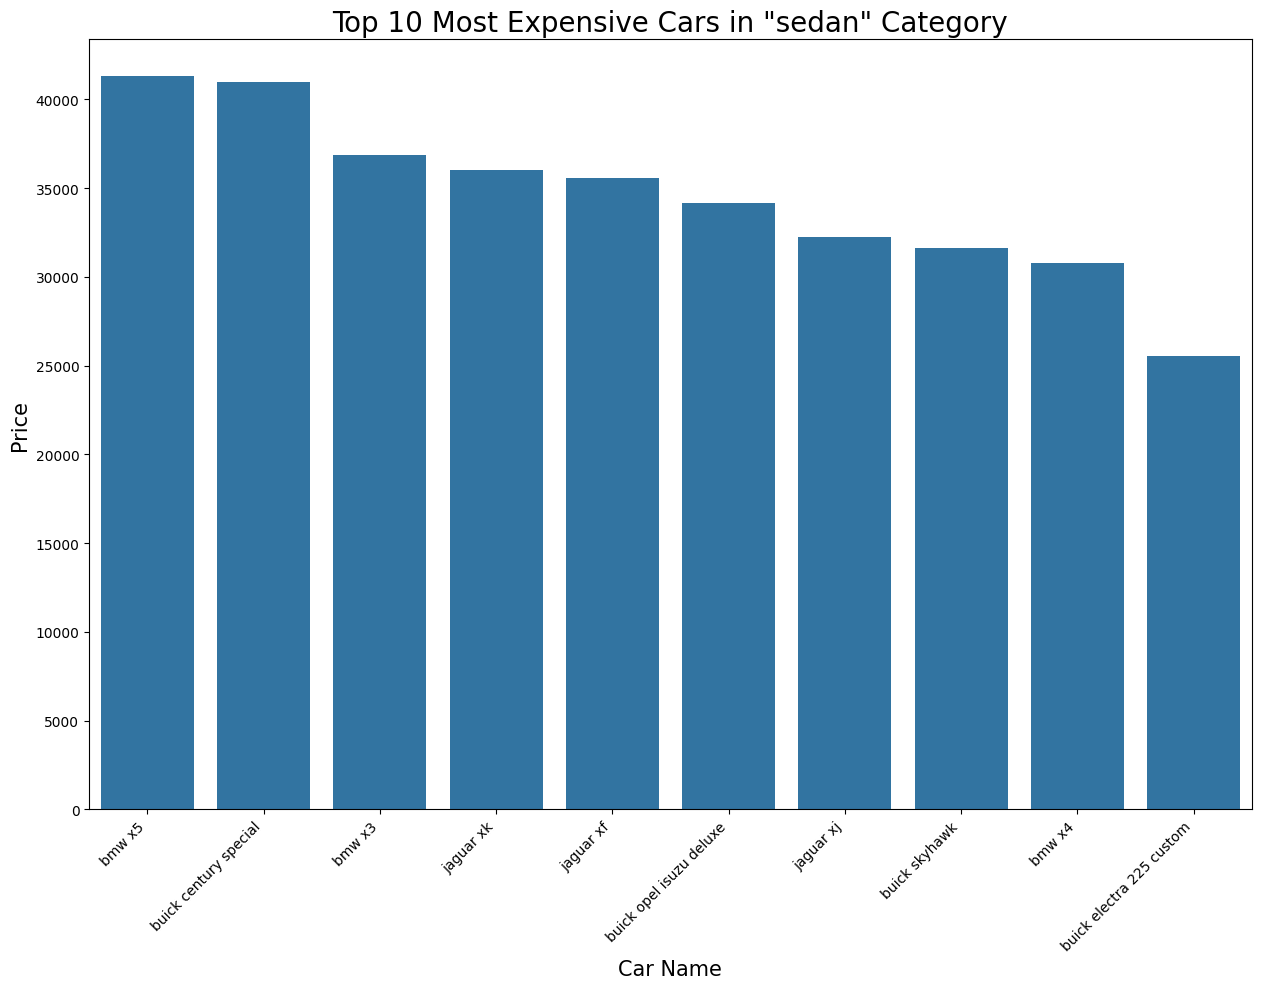

In [22]:
# Top 10 most expensive cars based on carbody type
def top10incategory_price(carbody_type):
    carbody_type = carbody_type.lower()
    top10 = car_df[car_df['carbody'] == carbody_type]
    top10cars = top10.sort_values(by='price', ascending=False).head(10)

    # Plotting
    plt.figure(figsize=(15, 10))
    plt.title(f'Top 10 Most Expensive Cars in "{carbody_type}" Category', size=20)
    plt.xlabel('Car Name', fontsize=15)
    plt.ylabel('Price', fontsize=15)
    graph = sns.barplot(x=top10cars['CarName'], y=top10cars['price'])
    graph.set_xticklabels(graph.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()

# Example usage
top10incategory_price('sedan')


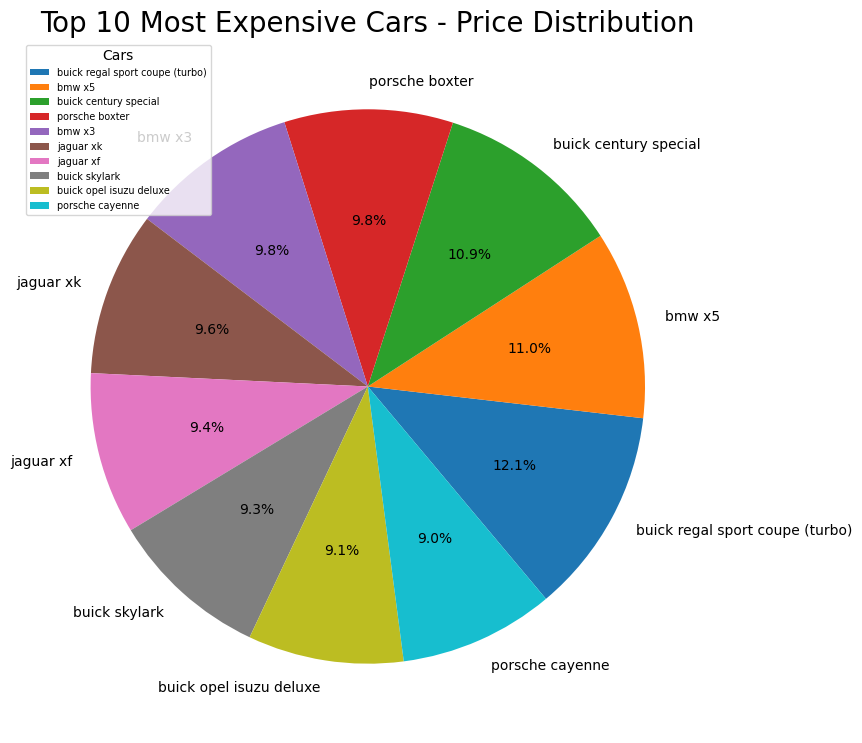

In [23]:
# Getting top 10 most expensive cars
top10_expensive_cars_df = car_df.sort_values(by='price', ascending=False).head(10)

# Plotting pie chart for top 10 expensive cars based on price
car_names = top10_expensive_cars_df['CarName'].tolist()
car_prices = top10_expensive_cars_df['price'].tolist()

plt.figure(figsize=(12, 9))
plt.pie(car_prices, labels=car_names, autopct='%1.1f%%', startangle=-50)
plt.title('Top 10 Most Expensive Cars - Price Distribution', size=20)
plt.legend(car_names, loc="upper left", title="Cars", fontsize="x-small")
plt.show()


In [24]:
# Description of the 'price' feature
print('The mean price of a car is', car_df['price'].mean())
print('The maximum price of a car is', car_df['price'].max())

# Full statistical summary
car_df['price'].describe()


The mean price of a car is 13276.710570731706
The maximum price of a car is 45400.0


,price
count,205.000000
mean,13276.710571
std,7988.852332
min,5118.000000
25%,7788.000000
50%,10295.000000
75%,16503.000000
max,45400.000000


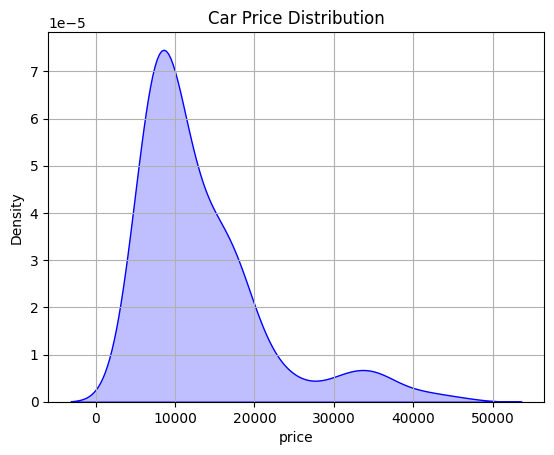

In [35]:
sns.kdeplot(car_df['price'], shade=True, color="blue")
plt.title("Car Price Distribution")
plt.grid()
plt.show()




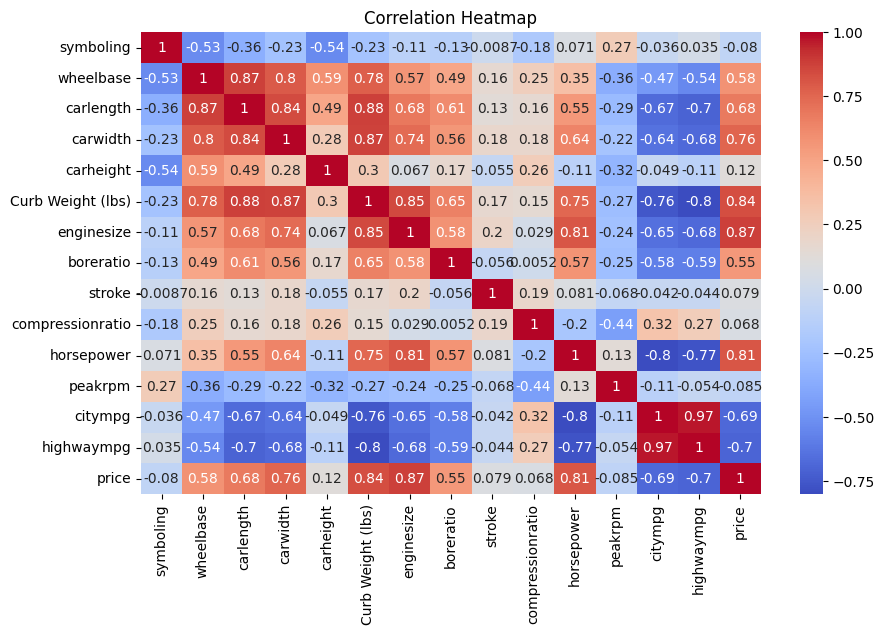

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(car_df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


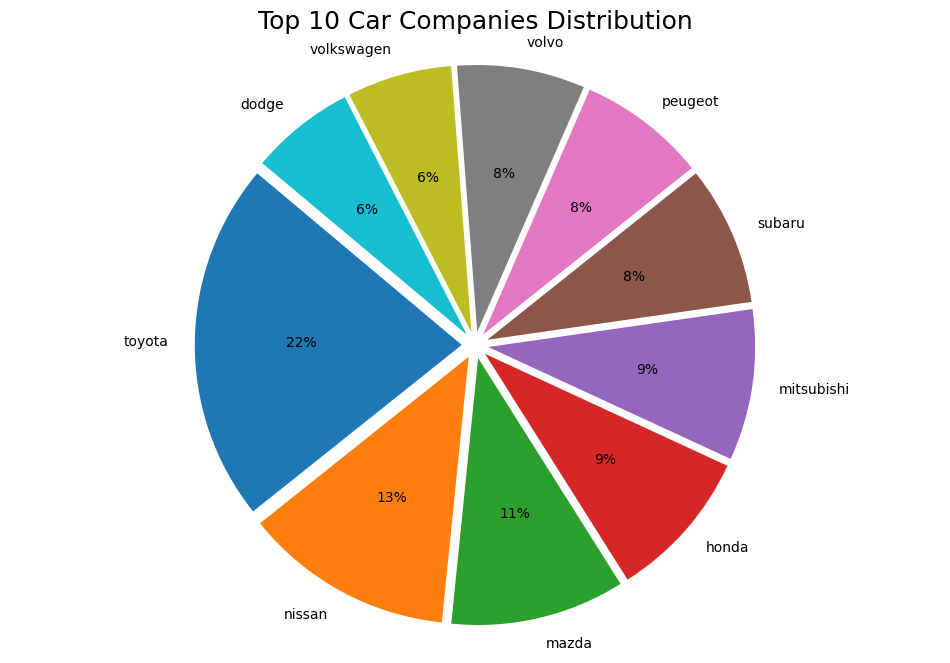

In [ ]:
# Extracting company name from CarName
carprice_df['Company'] = carprice_df['CarName'].str.split(' ').str[0].str.lower()

# Top 10 companies by count
company_count = carprice_df['Company'].value_counts().reset_index()
company_count.columns = ['Company', 'Count']
top_10_companies = company_count.head(10)

# Pie plot of top 10 companies
plt.figure(figsize=(12, 8))
plt.pie(top_10_companies['Count'], labels=top_10_companies['Company'], autopct='%.0f%%', startangle=140, explode=[0.05]*10)
plt.title('Top 10 Car Companies Distribution', fontsize=18)
plt.axis('equal')  # For a perfect circle
plt.grid()
plt.show()



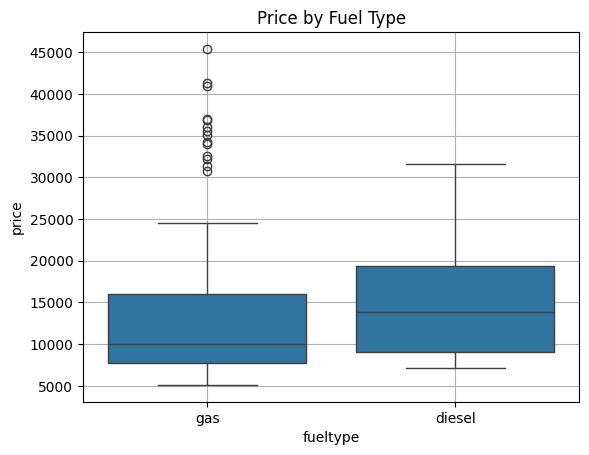

In [40]:
sns.boxplot(x='fueltype', y='price', data=car_df)
plt.title("Price by Fuel Type")
plt.grid()
plt.show()

In [41]:
car_df_encoded = pd.get_dummies(car_df, drop_first=True)
X = car_df_encoded.drop('price', axis=1)
y = car_df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [42]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.8753558632491092
